<a href="https://www.kaggle.com/code/shraddhavats/zomato-eda-shraddha-vats?scriptVersionId=135397802" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


Data Cleaning:

Deleting redundant columns.

Renaming the columns.

Dropping duplicates.

Cleaning individual columns.

Remove the NaN values from the dataset

Check for some more Transformations


Restaurants delivering Online or not

Restaurants allowing table booking or not

Table booking Rate vs Rate

Best Location

Relation between Location and Rating

Restaurant Type

Gaussian Rest type and Rating

Types of Services

Relation between Type and Rating

Cost of Restaurant

No. of restaurants in a Location

Restaurant type

Most famous restaurant chains in Bengaluru

Regression Analysis:


Linear Regression

Decision Tree Regression

Random Forest Regression

# READING FILES-

In [2]:
df=pd.read_csv("/kaggle/input/zomato-eda/zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.shape

(51717, 17)

In [4]:
df.index

RangeIndex(start=0, stop=51717, step=1)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Deleting redundant columns-

In [6]:
df.drop(['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item', 'listed_in(city)'], axis=1, inplace=True)
# df.drop(['votes'], axis=1, inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


# Renaming the columns-

In [7]:
df.rename(columns={'name':'Restaurants_Name', 'online_order':'Online_order', 'book_table':'Booking', 'rate':'Rating', 'location':'Location', 'rest_type':'Restaurant_Type', 'approx_cost(for two people)':'Table_Booking_Rate (for two people)', 'listed_in(type)':'type'}, inplace=True)
df

,Restaurants_Name,Online_order,Booking,Rating,votes,Location,Restaurant_Type,cuisines,Table_Booking_Rate (for two people),type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


# Dropping duplicates-

In [8]:
(df[df.duplicated()].count()).sum()

162840

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
(df[df.duplicated()].count()).sum()

0

In [11]:
df

,Restaurants_Name,Online_order,Booking,Rating,votes,Location,Restaurant_Type,cuisines,Table_Booking_Rate (for two people),type
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


# Remove the NaN values from the dataset

In [12]:
df.isnull().sum().sum()

4194

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum().sum()

0

# Cleaning individual columns-

In [15]:
df['Restaurants_Name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [16]:
df['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
df['Rating'].replace('NEW', 0, inplace=True)
df['Rating'].replace('-', 0, inplace=True)
df.Rating.replace('\/5','',regex = True,inplace = True)
df['Rating']=df['Rating'].astype(float)

In [18]:
df['Location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [19]:
df['Restaurant_Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [20]:
df['Table_Booking_Rate (for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [21]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

df['Table_Booking_Rate (for two people)']=df['Table_Booking_Rate (for two people)'].apply(money)

In [22]:
df['Table_Booking_Rate (for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: Table_Booking_Rate (for two people), Length: 30958, dtype: int64

In [23]:
df

,Restaurants_Name,Online_order,Booking,Rating,votes,Location,Restaurant_Type,cuisines,Table_Booking_Rate (for two people),type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars


In [24]:
df['Location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Restaurants_Name                     30958 non-null  object 
 1   Online_order                         30958 non-null  object 
 2   Booking                              30958 non-null  object 
 3   Rating                               30958 non-null  float64
 4   votes                                30958 non-null  int64  
 5   Location                             30958 non-null  object 
 6   Restaurant_Type                      30958 non-null  object 
 7   cuisines                             30958 non-null  object 
 8   Table_Booking_Rate (for two people)  30958 non-null  int64  
 9   type                                 30958 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.6+ MB


# DATA VISUALIZATION-

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Restaurants delivering Online or not**

<Axes: xlabel='Online_order', ylabel='count'>

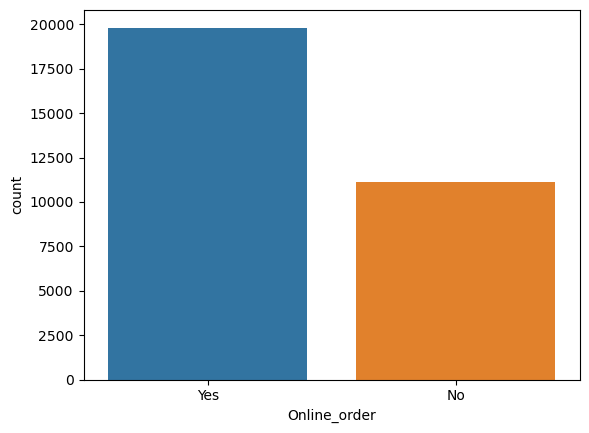

In [27]:
sns.countplot(x='Online_order', data=df)

- Here we plotted countplot for checking whether the restaurants are delivering online or not.
- we concluded that 20000 restaurant are delivering online foods and near about 11000 are not delivering online foods
- So by observations we concluded that most of the restaurant are delivering online foods.

**Restaurants allowing table booking or not**

<Axes: xlabel='Booking', ylabel='count'>

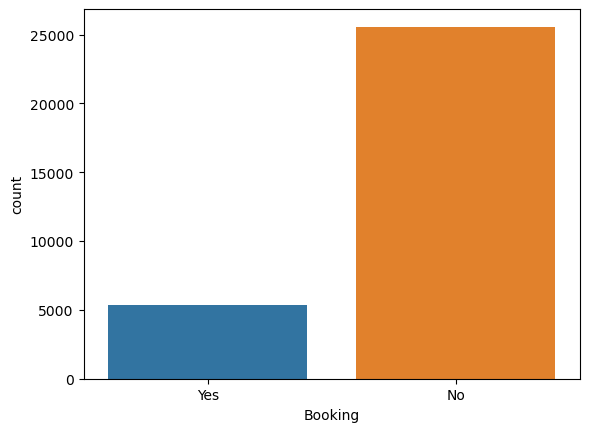

In [28]:
sns.countplot(x='Booking', data=df)

- Here we plotted countplot for checking whether restaurant are allowing table booking or not.
- We concluded that 5000 restaurant are allowing for table booking and 25000 are not allowing for booking.
- So by observations we concluded that most of the restaurant are not allowing table booking.

**Table booking Rate vs Rate**

<Axes: xlabel='Booking', ylabel='Rating'>

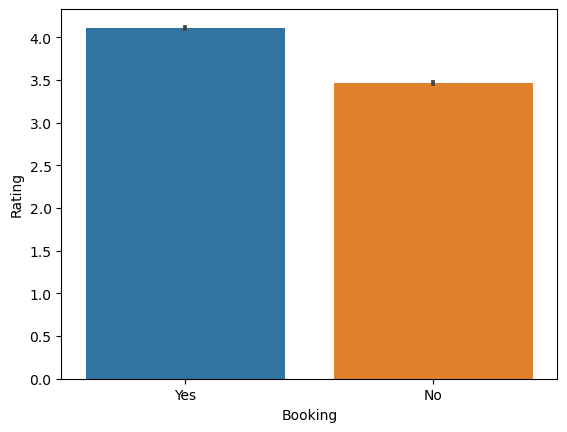

In [29]:
sns.barplot(x='Booking', y='Rating', data=df)

- Here we plotted barplot for checking rating according to table booking.
- We concluded that about 4.0 rating restaurants were accepting table booking and near about 3.4 rating restaurants were not accepting table booking.
- So by observation we concluded that restaurants with highest rating were accepting booking.

**Best Location**

In [30]:
temp=df.groupby('Location')[['Restaurants_Name']].count().reset_index()
temp

,Location,Restaurants_Name
0,BTM,2228
1,Banashankari,502
2,Banaswadi,344
3,Bannerghatta Road,907
4,Basavanagudi,431
...,...,...
87,West Bangalore,5
88,Whitefield,1630
89,Wilson Garden,109
90,Yelahanka,4


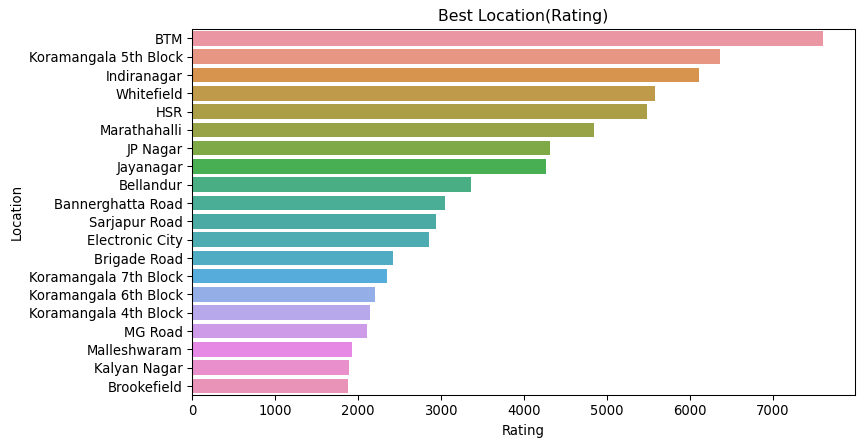

In [31]:
plt.figure(figsize=(9,5),dpi=95)
plt.title('Best Location(Rating)')
temp = df.groupby('Location')[['Rating']].sum().sort_values(by = 'Rating', ascending=False).head(20)
sns.barplot(temp, y = temp.index, x = 'Rating');

- Here we plotted barplot for checking best location according to the rating.
- This graphs shows that which location has the most number of restaurant and which has the lowest number of restaurant.
- We concluded that BTM is the location with highest number of restaurant.

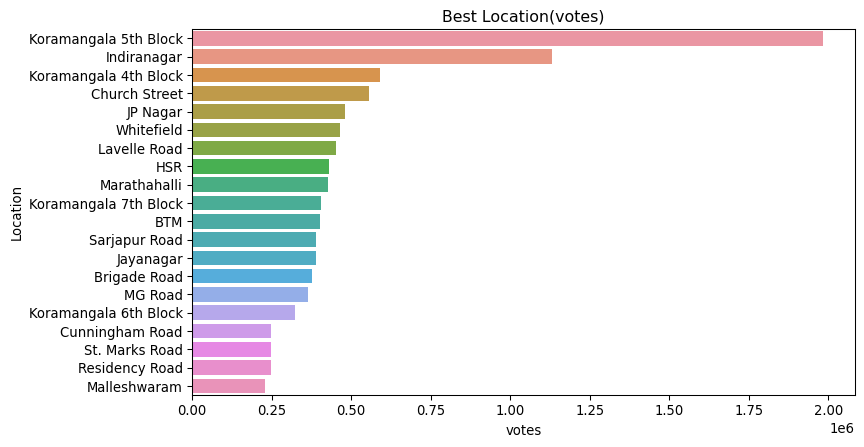

In [32]:
plt.figure(figsize=(9,5),dpi=95)
plt.title('Best Location(votes)')
temp2=df.groupby('Location')[['votes']].sum().sort_values(by = 'votes', ascending=False).head(20)
sns.barplot(temp2, x='votes', y=temp2.index);

- Here we plotted barplot for checking best location according to the votes.
- This graphs shows that which location has the most number of restaurant and which has the lowest number of restaurant.
- We concluded that Koramangala 5th Block is the location with highest number of restaurant according to the votes.

**Relation between Location and Rating**

<Axes: title={'center': 'Relation between Location and Rating'}, xlabel='Rating', ylabel='Location'>

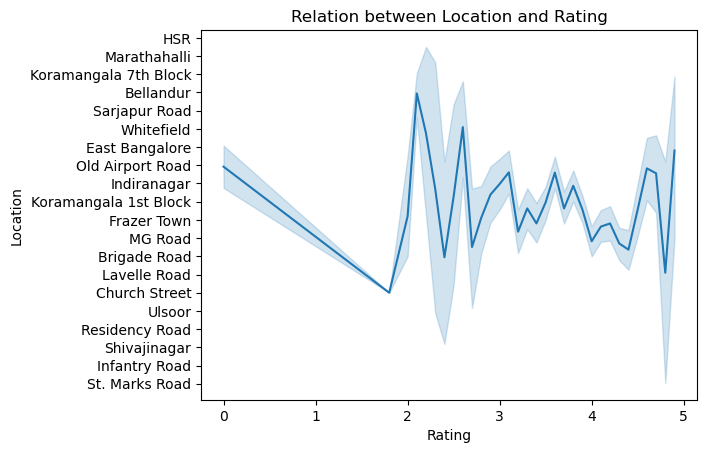

In [33]:
plt.title('Relation between Location and Rating')
sns.lineplot(df, y = 'Location', x = 'Rating')

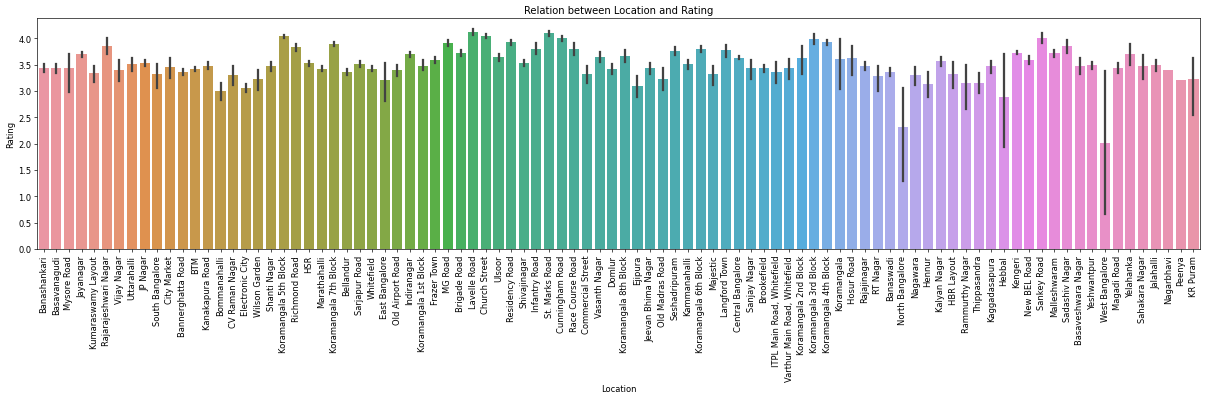

In [34]:
plt.figure(figsize=(25,5),dpi=60)
plt.title('Relation between Location and Rating')
plt.xticks(rotation=90)
sns.barplot(x='Location', y='Rating', data=df);

- Here we plotted lineplot and barplot for showing relationship between restaurant locations and rating.

**Restaurant Type**

<Axes: title={'center': 'Restaurant types'}, xlabel='Restaurant_Type'>

<Figure size 800x400 with 0 Axes>

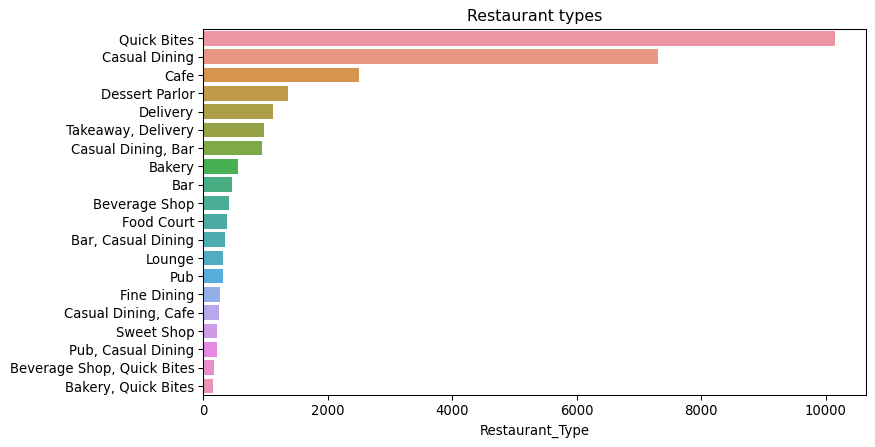

In [35]:
plt.figure(figsize = (10,5), dpi = 80)
rest_type = df['Restaurant_Type'].value_counts().head(20)
rest_type.to_frame()
plt.figure(figsize=(9,5),dpi=95)
plt.title('Restaurant types')
sns.barplot(y = rest_type.index, x = rest_type)

- Here we plotted barplot for checking Restaurant Type according to rating.
- We concluded that Quick Bites is the maximum type of restaurant.

**Gaussian Rest type and Rating**

In [36]:
rest_rate=df.groupby('Restaurant_Type')[['Rating']].sum().sort_values(by='Rating', ascending=False).head(20)
rest_rate


,Rating
Restaurant_Type,
Quick Bites,33727.1
Casual Dining,26923.8
Cafe,9386.1
Dessert Parlor,5091.5
"Casual Dining, Bar",3809.0
Delivery,3801.3
"Takeaway, Delivery",3017.1
Bakery,1839.5
Bar,1713.1


**Types of Services**

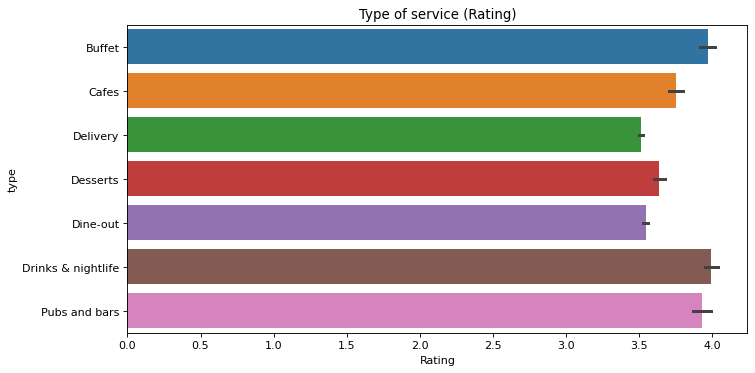

In [37]:
plt.figure(figsize = (10,5), dpi = 80)
plt.title('Type of service (Rating)')
sns.barplot(x='Rating', y='type', data=df);

- Here we plotted barplot for type of service according to rating.
- We concluded that Drinks & nighlife and Buffet are the best service according to the ratings.

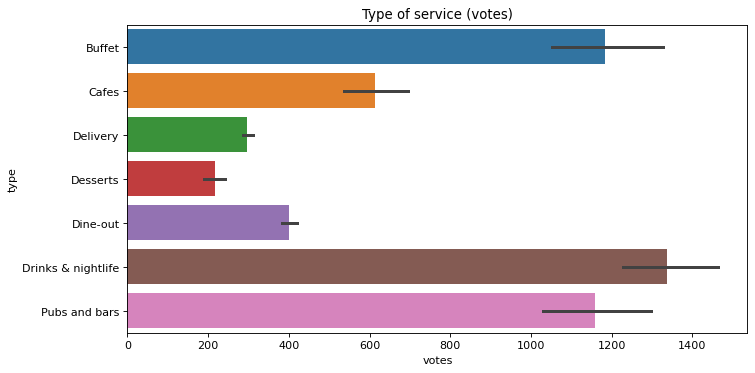

In [38]:
plt.figure(figsize = (10,5), dpi = 80)
plt.title('Type of service (votes)')
sns.barplot(x='votes', y='type', data=df);

- Here we plotted barplot for type of service according to votes.
- We concluded that Drinks & nighlife is the best service according to the votes.

**Relation between Type and Rating**

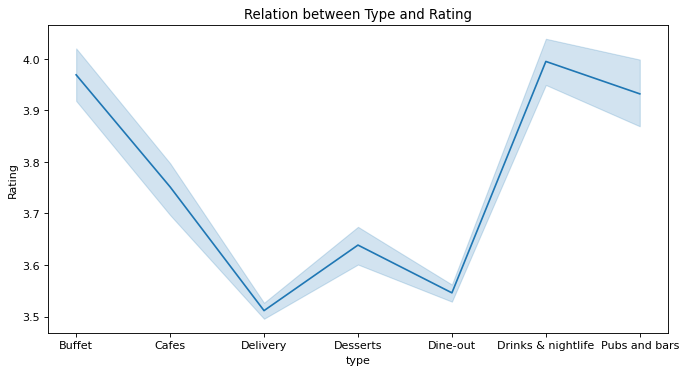

In [39]:
plt.figure(figsize = (10,5), dpi = 80)
plt.title('Relation between Type and Rating')
sns.lineplot(x='type', y='Rating', data=df);

- Here we plotted lineplot for showing relation between type and rating.
- We concluded that 'Buffet', 'Cafes', 'Drink & nightlife' and 'Pubs and bars' has highest rating.
- And 'delivery', 'Desserts type', and 'Dine-out' has lowest ratings.

In [40]:
df

,Restaurants_Name,Online_order,Booking,Rating,votes,Location,Restaurant_Type,cuisines,Table_Booking_Rate (for two people),type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars


**Cost of Restaurant**

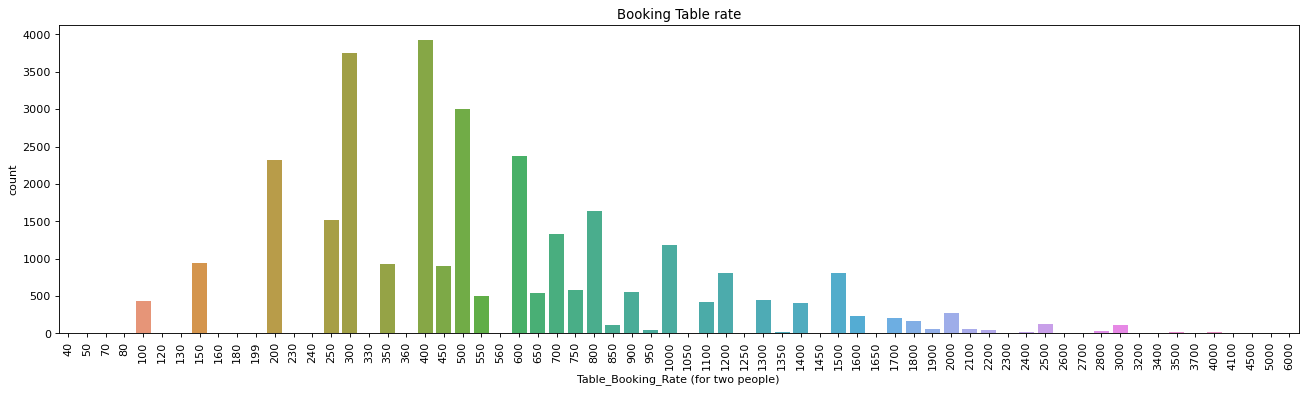

In [41]:
plt.figure(figsize=(20,5), dpi=80)
plt.xticks(rotation=90)
plt.title('Booking Table rate')
sns.countplot(x='Table_Booking_Rate (for two people)', data=df);

- Here we plotted countplot of Table booking rates.
- We concluded that maximum numbers of restaurant were cost 400.

**No. of restaurants in a Location**

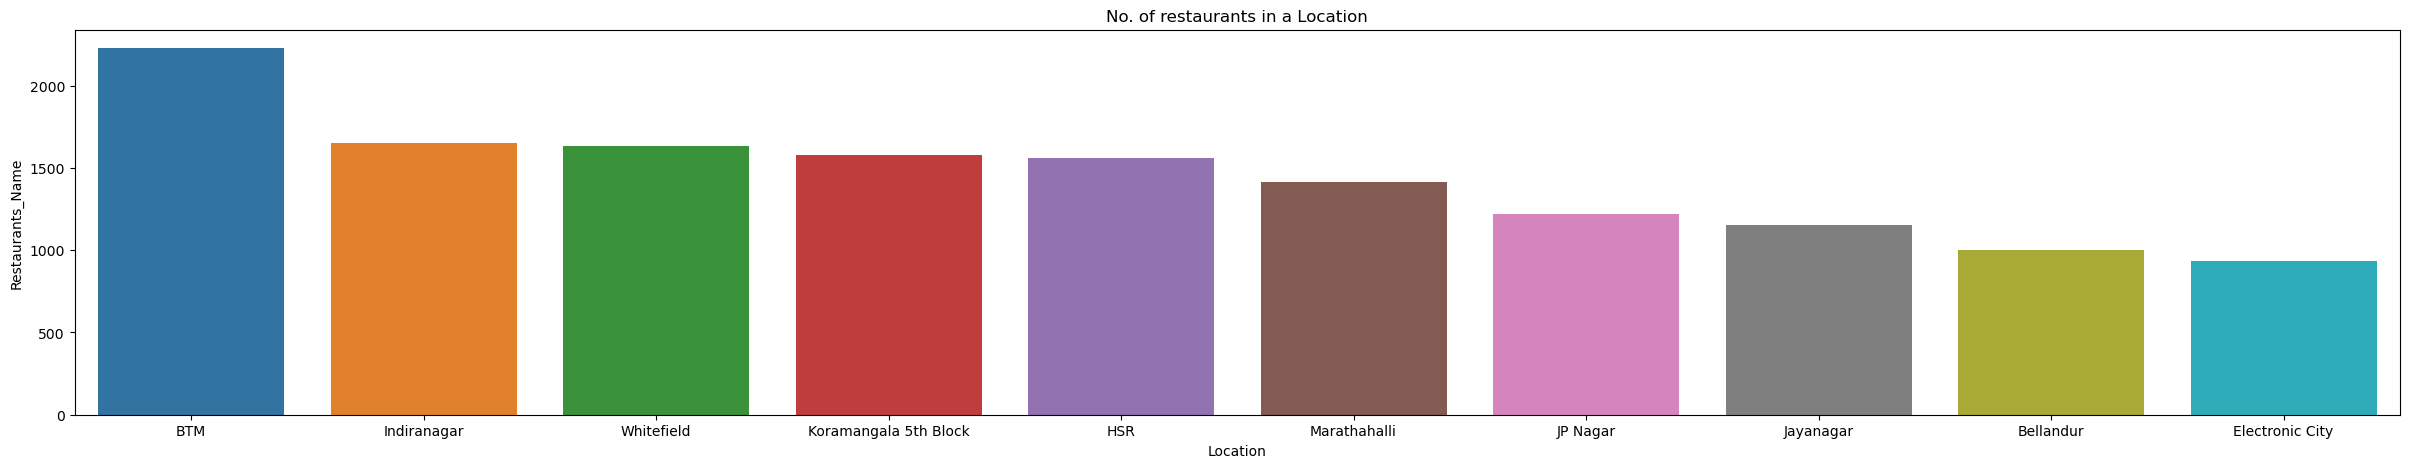

In [42]:
plt.figure(figsize=(30,5), dpi=100)
plt.title('No. of restaurants in a Location')
dfy=df.groupby('Location')[['Restaurants_Name']].count().sort_values(by='Restaurants_Name', ascending=False).head(10)
dfy
sns.barplot(y='Restaurants_Name', x=dfy.index, data=dfy);

- Here we plotted barplot for showing number of restaurants in locations.
- We concluded that BTM has maximum numbers of restaurants

**Most famous restaurant chains in Bengaluru**

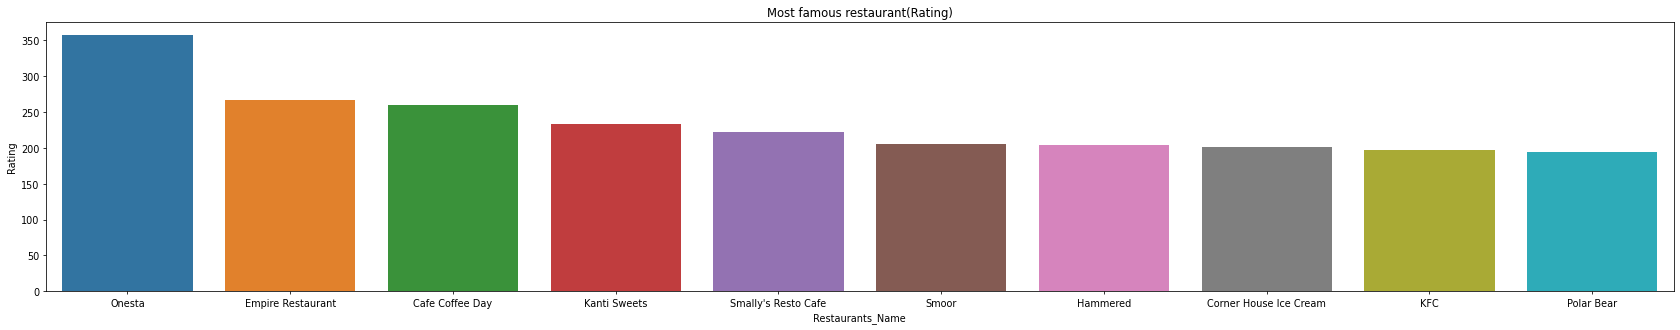

In [43]:

dff=df.groupby('Restaurants_Name')[['Rating']].sum().sort_values(by='Rating', ascending=False).head(10)
dff
plt.figure(figsize=(30, 5), dpi=70)
plt.title('Most famous restaurant(Rating)')
sns.barplot(x=dff.index, y='Rating', data=dff);

- Here we plotted barplot for showing most famous restaurant according to the rating.
- We concluded that onesta restaurant has highest number of rating.

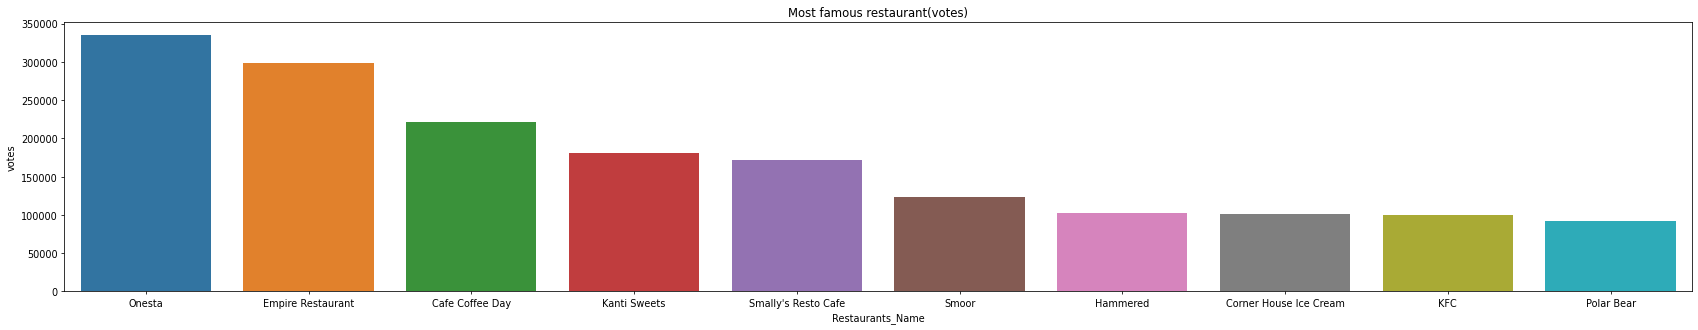

In [44]:
dff1=df.groupby('Restaurants_Name')[['votes']].sum().sort_values(by='votes', ascending=False).head(10)
dff1
plt.figure(figsize=(30, 5), dpi=70)
plt.title('Most famous restaurant(votes)')
sns.barplot(x=dff.index, y='votes', data=dff1);

- Here we plotted barplot for showing most famous restaurant according to the votes.
- We concluded that onesta restaurant has highest number of votes.

**Gaussian Rest type and Rating**

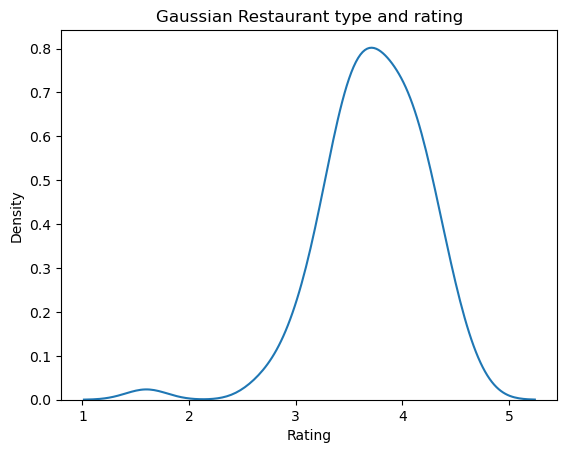

In [45]:
plt.title('Gaussian Restaurant type and rating')
gaussian=df.groupby('Restaurant_Type')['Rating'].mean()
sns.kdeplot(gaussian);

- Here we plotted kdeplot.
- We concluded that the plot is left skewed plot.
- The mean is less than median.